In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

## ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $\overline{X} \pm \frac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} S$ 

Точный доверительный интервал: $(\overline{X} \pm \frac{T_{n-1, \frac{1+\alpha}{2}}}{\sqrt{n-1}}S)$

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [3]:
def prefix_s2_estimator(X: np.ndarray) -> np.ndarray:
    # X.shape = (количество экспериментов, размер выборки)
    # результат.shape = (количество экспериментов, размер выборки) - содержит 
    # префиксные оценки по оси 1
    return np.cumsum(np.power(X, 2), axis = 1) / (np.arange(X.shape[1]) + 1) - \
                np.power(np.cumsum(X, axis = 1) / (np.arange(X.shape[1]) + 1), 2)

def prefix_s2_corrected_estimator(X: np.ndarray) -> np.ndarray:
    return (np.arange(X.shape[1]) + 1)[1::] * prefix_s2_estimator(X)[:,1::] / (np.arange(X.shape[1])[1::])

In [89]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95) -> tuple[np.ndarray, np.ndarray]:
    '''
    Функция для вычисления асимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    
    # ваш код
    return np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) - sps.norm.ppf((1 + alpha) / 2) * np.sqrt(prefix_s2_estimator(sample)) / np.sqrt(np.arange(sample.shape[1]) - 1), \
           np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(prefix_s2_estimator(sample)) / np.sqrt(np.arange(sample.shape[1]) - 1)

def calculate_confidence_intervals(sample, alpha=0.95) -> tuple[np.ndarray, np.ndarray]:
    '''
    Функция для вычисления неасимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''
    # ваш код
    return np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) - sps.t(df = sample.shape[1] - 1).ppf((1 + alpha) / 2) * np.sqrt(prefix_s2_estimator(sample)) / np.sqrt(np.arange(sample.shape[1])), \
           np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) + sps.t(df = sample.shape[1] - 1).ppf((1 + alpha) / 2) * np.sqrt(prefix_s2_estimator(sample)) / np.sqrt(np.arange(sample.shape[1]))
 

# Изначально <<семинарист>> сказал, что sample двумерный - поэтому так

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.

In [101]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка'
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''
    
    time = np.arange(len(left)) + 1
    
    assert len(time) == len(right)
    
    # plt.plot(left, label = "Нижняя граница")
    # plt.plot(right, label = "Верхняя граница")
    
    plt.fill_between(time,
                    right, 
                    left, 
                    color = color_interval, 
                    label = label_estimation,
                    alpha = 0.1)
    if sample is not None:
        plt.scatter(time, 
                    sample, 
                    color = color_sample,
                    label = 'Выборка')
    

    
    plt.legend(fontsize=16)
    plt.ylim(ylim) 
    plt.xlim(3, len(right))
    plt.xlabel('Размер выборки')
    plt.title('Зависимость доверительного интервала от размера выборки')
    plt.grid()

/tmp/ipykernel_29638/301449951.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) - sps.norm.ppf((1 + alpha) / 2) * np.sqrt(prefix_s2_estimator(sample)) / np.sqrt(np.arange(sample.shape[1]) - 1), \
/tmp/ipykernel_29638/301449951.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) - sps.norm.ppf((1 + alpha) / 2) * np.sqrt(prefix_s2_estimator(sample)) / np.sqrt(np.arange(sample.shape[1]) - 1), \
/tmp/ipykernel_29638/301449951.py:12: RuntimeWarning: divide by zero encountered in divide
  np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(prefix_s2_estimator(sample)) / np.sqrt(np.arange(sample.shape[1]) - 1)
/tmp/ipykernel_29638/301449951.py:12: RuntimeWarning: invalid value encountered in sqrt
  np.cumsum(sample, axis = 0) / np.arange(sample.shape[1]) + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(prefi

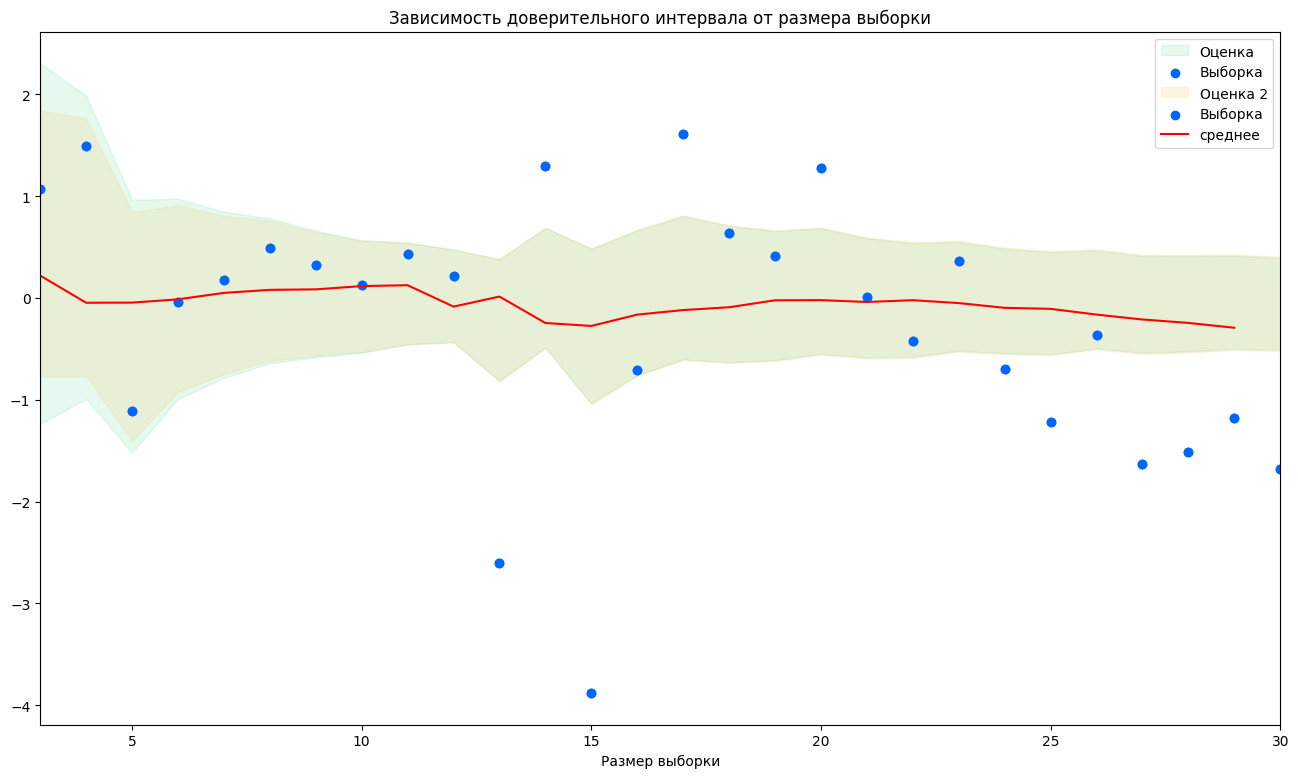

In [109]:
x = sps.norm.rvs(size = (1,30))

fig, ax = plt.subplots(figsize = (16, 9), dpi = 100)
left, right = calculate_asymptotic_confidence_intervals(x)
left1, right1 = calculate_confidence_intervals(x)
draw_confidence_interval(left[0], right[0], sample = x[0])
draw_confidence_interval(left1[0], 
                         right1[0], 
                         sample = x[0], 
                         label_estimation="Оценка 2", 
                         color_interval = 'orange');
plt.plot(np.cumsum(x[0]) / np.arange(1, 30 + 1), color = 'red', label = 'среднее')
plt.legend();

**Вывод:** Не могу написать код нормально за такое время

Можно хотя - бы день дедлайн?

Все так криво получилось, капец